# 1. What is Inductive Reasoning?

Inductive reasoning is making general conclusions from specific observations. An example I found online for it is if you assume that every dog is friendly, because all of the dogs you've met are friendly. Deductive reasoning is using general observations to make a specific conclusion.

# 2. Preprocessing of Heart Disease Dataset

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cleveland_df = pd.read_csv('processed.cleveland.data')
hungarian_df = pd.read_csv('processed.hungarian.data')
switzerland_df = pd.read_csv('processed.hungarian.data')
virginia_df = pd.read_csv('processed.va.data')

In [63]:
cleveland_df

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [64]:
def preprocessing():
    # standardizing the column names

    cleveland_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
    hungarian_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
    switzerland_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
    virginia_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
    # this combines the four dataframes to one

    cleveland_df_2 = pd.concat([cleveland_df, hungarian_df])
    cleveland_df_3 = pd.concat([cleveland_df_2, switzerland_df])
    heart_disease_df = pd.concat([cleveland_df_3, virginia_df])
    
    # this replaces ? with nan so i could easily check what columns have nan
    heart_disease_df = heart_disease_df.replace('?',np.nan)
    
    heart_disease_df['trestbps'] = heart_disease_df['trestbps'].astype(float)
    heart_disease_df['chol'] = heart_disease_df['chol'].astype(float)
    heart_disease_df['fbs'] = heart_disease_df['fbs'].astype(float)
    heart_disease_df['restecg'] = heart_disease_df['restecg'].astype(float)
    heart_disease_df['thalach'] = heart_disease_df['thalach'].astype(float)
    heart_disease_df['exang'] = heart_disease_df['exang'].astype(float)
    heart_disease_df['oldpeak'] = heart_disease_df['oldpeak'].astype(float)
    heart_disease_df['slope'] = heart_disease_df['slope'].astype(float)
    heart_disease_df['ca'] = heart_disease_df['ca'].astype(float)
    heart_disease_df['thal'] = heart_disease_df['thal'].astype(float)
    
    heart_disease_df['trestbps'] = heart_disease_df['trestbps'].fillna(heart_disease_df['trestbps'].median())
    heart_disease_df['chol'] = heart_disease_df['chol'].fillna(heart_disease_df['chol'].median())
    heart_disease_df['fbs'] = heart_disease_df['fbs'].fillna(heart_disease_df['fbs'].median())
    heart_disease_df['restecg'] = heart_disease_df['restecg'].fillna(heart_disease_df['restecg'].median())
    heart_disease_df['thalach'] = heart_disease_df['thalach'].fillna(heart_disease_df['thalach'].median())
    heart_disease_df['exang'] = heart_disease_df['exang'].fillna(heart_disease_df['exang'].median())
    heart_disease_df['oldpeak'] = heart_disease_df['oldpeak'].fillna(heart_disease_df['oldpeak'].median())
    heart_disease_df['slope'] = heart_disease_df['slope'].fillna(heart_disease_df['slope'].median())
    heart_disease_df['ca'] = heart_disease_df['ca'].fillna(heart_disease_df['ca'].median())
    heart_disease_df['thal'] = heart_disease_df['thal'].fillna(heart_disease_df['thal'].median())
    
    # the num column is the diagnosis, and 0 is below 50%, 1 is above, and then there's also 2,3,4
    # i replaced 2,3,4 with 1
    heart_disease_df['num'] = np.where(heart_disease_df['num'] > 1,1, heart_disease_df['num'])



In [65]:
# cleveland_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
# hungarian_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
# switzerland_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
# virginia_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
# # this combines the four dataframes to one

# cleveland_df_2 = pd.concat([cleveland_df, hungarian_df])
# cleveland_df_3 = pd.concat([cleveland_df_2, switzerland_df])
# heart_disease_df = pd.concat([cleveland_df_3, virginia_df])

# # this replaces ? with nan so i could easily check what columns have nan
# heart_disease_df = heart_disease_df.replace('?',np.nan)

# heart_disease_df['trestbps'] = heart_disease_df['trestbps'].astype(float)
# heart_disease_df['chol'] = heart_disease_df['chol'].astype(float)
# heart_disease_df['fbs'] = heart_disease_df['fbs'].astype(float)
# heart_disease_df['restecg'] = heart_disease_df['restecg'].astype(float)
# heart_disease_df['thalach'] = heart_disease_df['thalach'].astype(float)
# heart_disease_df['exang'] = heart_disease_df['exang'].astype(float)
# heart_disease_df['oldpeak'] = heart_disease_df['oldpeak'].astype(float)
# heart_disease_df['slope'] = heart_disease_df['slope'].astype(float)
# heart_disease_df['ca'] = heart_disease_df['ca'].astype(float)
# heart_disease_df['thal'] = heart_disease_df['thal'].astype(float)

# heart_disease_df['trestbps'] = heart_disease_df['trestbps'].fillna(heart_disease_df['trestbps'].median())
# heart_disease_df['chol'] = heart_disease_df['chol'].fillna(heart_disease_df['chol'].median())
# heart_disease_df['fbs'] = heart_disease_df['fbs'].fillna(heart_disease_df['fbs'].median())
# heart_disease_df['restecg'] = heart_disease_df['restecg'].fillna(heart_disease_df['restecg'].median())
# heart_disease_df['thalach'] = heart_disease_df['thalach'].fillna(heart_disease_df['thalach'].median())
# heart_disease_df['exang'] = heart_disease_df['exang'].fillna(heart_disease_df['exang'].median())
# heart_disease_df['oldpeak'] = heart_disease_df['oldpeak'].fillna(heart_disease_df['oldpeak'].median())
# heart_disease_df['slope'] = heart_disease_df['slope'].fillna(heart_disease_df['slope'].median())
# heart_disease_df['ca'] = heart_disease_df['ca'].fillna(heart_disease_df['ca'].median())
# heart_disease_df['thal'] = heart_disease_df['thal'].fillna(heart_disease_df['thal'].median())

# # the num column is the diagnosis, and 0 is below 50%, 1 is above, and then there's also 2,3,4
# # i replaced 2,3,4 with 1
# heart_disease_df['num'] = np.where(heart_disease_df['num'] > 1,1, heart_disease_df['num'])


In [66]:
preprocessing()

# 3. Decision Tree Model

In [67]:
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randomFloat
from scipy.stats import randint as sp_randomInt

In [82]:
X = heart_disease_df.drop('num', axis = 1)
y = heart_disease_df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13,
                                                    stratify=y)


def decisiontree():
    model = tree.DecisionTreeClassifier(max_depth=15, random_state=13, class_weight='balanced')

    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)



    print(classification_report(y_test, y_pred))
    
decisiontree()

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       177
           1       0.83      0.87      0.85       150

    accuracy                           0.86       327
   macro avg       0.86      0.86      0.86       327
weighted avg       0.86      0.86      0.86       327



I tweaked the code a lot and this was the best that I was able to get it to. I just went down the list of parameters on the documentation and tried various things out. I also tried the RandomSearchCV below, which I found online and thought would help me to find the best values for different parameters. It didn't help me really to find the best recall value, and the recall and precision values are already pretty high.

In [69]:
# # this checks for the best params (it only really helped me improve a little bit. it hurt at first by a lot, bringing my recall down to 70. i found that changing the class weights
# # brought my recall up by 1.

# X = heart_disease_df.drop('num', axis = 1)
# y = heart_disease_df['num']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13,
#                                                     stratify=y)

# model = tree.DecisionTreeClassifier(max_depth=15, random_state=13)

# model = model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

# parameters = {'max_depth': sp_randomInt(1, 50),
#               'min_samples_split': sp_randomInt(1,50),
#               'min_samples_leaf': sp_randomInt(1,50),
#               'class_weight': [None, 'balanced'],
#               'max_leaf_nodes': sp_randomInt(1,50)
#               }

# random_search = RandomizedSearchCV(estimator=model,
#                                    param_distributions = parameters,
#                                    cv = 2, n_iter = 10, n_jobs=-1, scoring='recall')

# random_search.fit(X_train, y_train)

# print(random_search.best_params_)

# # print(classification_report(y_test, y_pred))

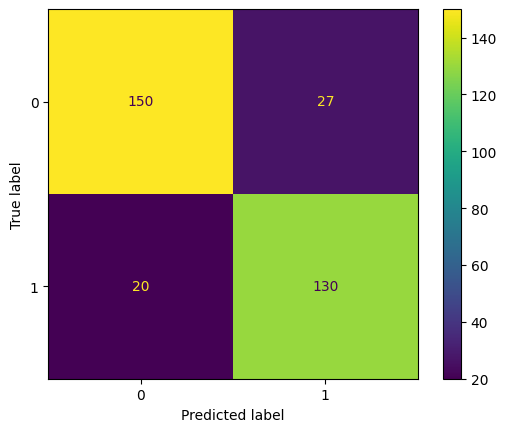

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

[Text(0.44666999113475175, 0.96875, 'cp <= 3.5\ngini = 0.5\nsamples = 760\nvalue = [380.0, 380.0]'),
 Text(0.2120456560283688, 0.90625, 'age <= 56.5\ngini = 0.372\nsamples = 408\nvalue = [294.939, 96.905]'),
 Text(0.3293578235815603, 0.9375, 'True  '),
 Text(0.12477836879432624, 0.84375, 'oldpeak <= 0.55\ngini = 0.278\nsamples = 303\nvalue = [239.465, 47.908]'),
 Text(0.07225177304964539, 0.78125, 'chol <= 493.0\ngini = 0.171\nsamples = 233\nvalue = [197.859, 20.688]'),
 Text(0.06515957446808511, 0.71875, 'cp <= 1.5\ngini = 0.156\nsamples = 231\nvalue = [197.859, 18.51]'),
 Text(0.028368794326241134, 0.65625, 'chol <= 270.0\ngini = 0.481\nsamples = 11\nvalue = [6.472, 4.355]'),
 Text(0.014184397163120567, 0.59375, 'chol <= 171.0\ngini = 0.247\nsamples = 8\nvalue = [6.472, 1.089]'),
 Text(0.0070921985815602835, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 1.089]'),
 Text(0.02127659574468085, 0.53125, 'gini = -0.0\nsamples = 7\nvalue = [6.472, 0.0]'),
 Text(0.0425531914893617, 0.5937

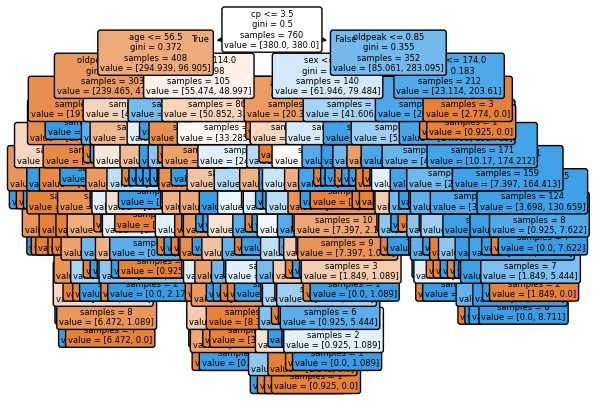

In [71]:
tree.plot_tree(model, feature_names=list(X.columns),filled=True,
               fontsize=6,rounded=True)

# 4. Random Forest Model

In [72]:
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

In [80]:
from sklearn.ensemble import RandomForestClassifier

def randomforest():
    rf = RandomForestClassifier(n_estimators=100, random_state=13, max_depth=35, min_samples_split=2)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(rf.score(X_test, y_test))
    print(classification_report(y_test, y_pred))
    
randomforest()

0.8929663608562691
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       177
           1       0.87      0.91      0.89       150

    accuracy                           0.89       327
   macro avg       0.89      0.89      0.89       327
weighted avg       0.89      0.89      0.89       327



Here I messed around with the different parameters like before and this was the best I could get it to be. 

[Text(0.5069192102713178, 0.9772727272727273, 'x[1] <= -0.602\ngini = 0.497\nsamples = 481\nvalue = [409.0, 351.0]'),
 Text(0.1996124031007752, 0.9318181818181818, 'x[12] <= 0.696\ngini = 0.3\nsamples = 116\nvalue = [151, 34]'),
 Text(0.3532658066860465, 0.9545454545454546, 'True  '),
 Text(0.13049095607235142, 0.8863636363636364, 'x[3] <= 0.685\ngini = 0.24\nsamples = 107\nvalue = [148, 24]'),
 Text(0.06459948320413436, 0.8409090909090909, 'x[7] <= -1.334\ngini = 0.182\nsamples = 87\nvalue = [124, 14]'),
 Text(0.020671834625323, 0.7954545454545454, 'x[2] <= 0.415\ngini = 0.49\nsamples = 6\nvalue = [4, 3]'),
 Text(0.0103359173126615, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(0.031007751937984496, 0.75, 'x[7] <= -1.844\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.020671834625323, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.041343669250646, 0.7045454545454546, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.10852713178294573, 0.79545

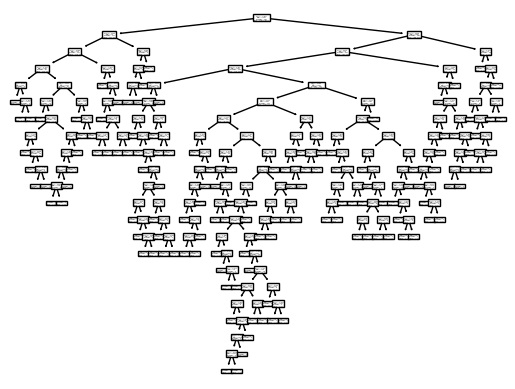

In [74]:
rf_tree = rf.estimators_[4]
tree.plot_tree(rf_tree)

# 5. XGBoost Model

In [98]:
from xgboost import XGBClassifier

def xgboost():
    xgb = XGBClassifier(max_depth=5, eta=0.6, subsample=0.9, colsample_bytree=0.6)
    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)
    print(classification_report(y_test, y_pred))
    
xgboost()

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       177
           1       0.87      0.91      0.89       150

    accuracy                           0.90       327
   macro avg       0.89      0.90      0.90       327
weighted avg       0.90      0.90      0.90       327



Here, same as before, I was just messing around and tinkering with the different parameters trying to see what brings up the recall. This model has also been working very weirdly for me, because sometimes when I run it, the recall will be as high as 0.89, but other times it shows 0.37, so I'm confused about that and have tried to change different things to see why it's happening. Right now when it's working, with these parameters I found on the documentation, I'm able to get the recall up to 0.91.

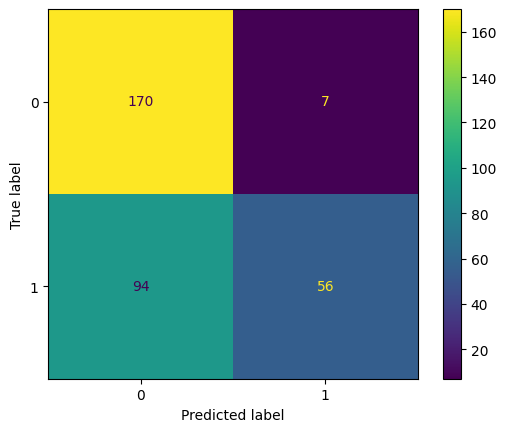

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)